In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# # 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor

# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

import seaborn as sns

# 데이터 가져오기

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw= pd.read_csv("/home/pirl/test/BigData/BOSTON_HOUSING.csv", encoding='euc-kr')
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [3]:
df_raw.shape

(506, 14)

# 데이터 탐색
- 결측치
- 이상치
- 분포

In [4]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


### 변수들의 결측 및 이상치 처리

In [5]:
# 결측값 체크
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# Boxplot으로 분포 확인

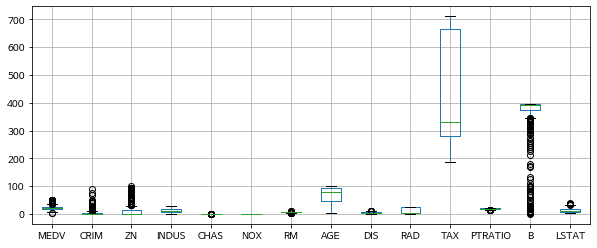

In [6]:
# boxploat: 상자수염도, figsize: 그래프 크기(x축, y축)
df_raw.boxplot(figsize = (10, 4))

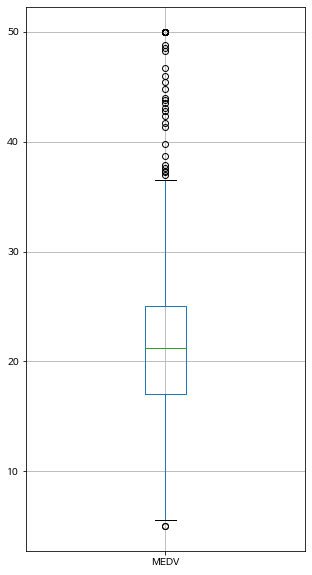

In [7]:
df_raw_M = df_raw[["MEDV"]]
df_raw_M.boxplot(figsize = (5, 10))

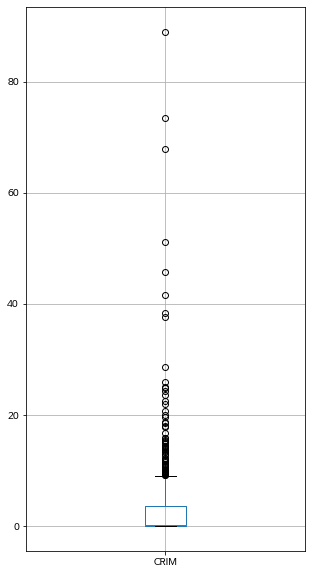

In [8]:
df_raw_C = df_raw[["CRIM"]]
df_raw_C.boxplot(figsize = (5, 10))

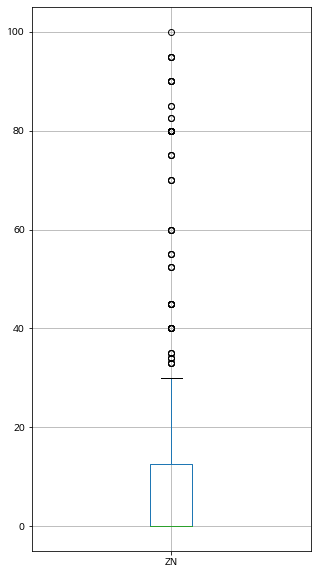

In [9]:
df_raw_Z = df_raw[["ZN"]]
df_raw_Z.boxplot(figsize = (5, 10))

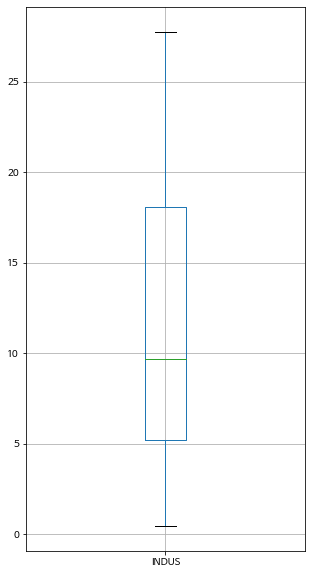

In [10]:
df_raw_I = df_raw[["INDUS"]]
df_raw_I.boxplot(figsize = (5, 10))

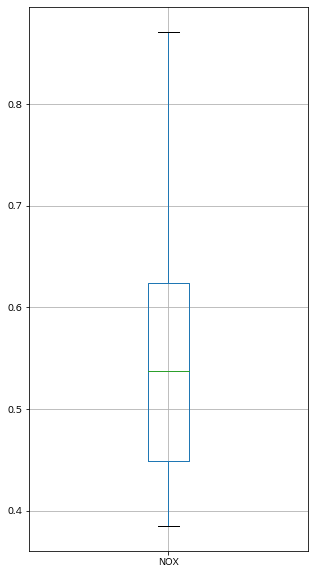

In [11]:
df_raw_N = df_raw[["NOX"]]
df_raw_N.boxplot(figsize = (5, 10))

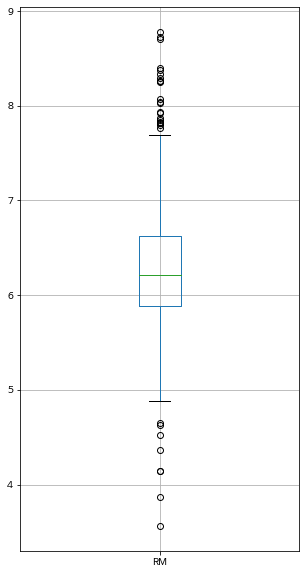

In [12]:
df_raw_R = df_raw[["RM"]]
df_raw_R.boxplot(figsize = (5, 10))

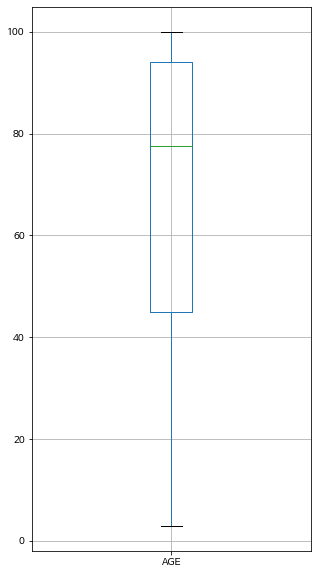

In [13]:
df_raw_A = df_raw[["AGE"]]
df_raw_A.boxplot(figsize = (5, 10))

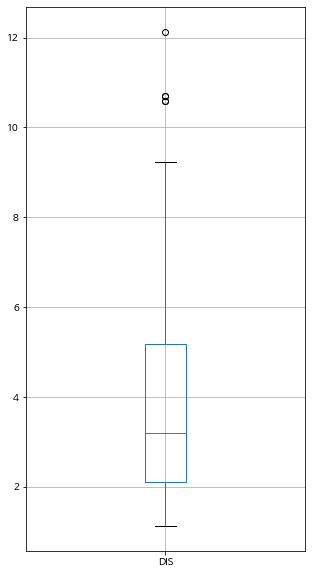

In [14]:
df_raw_D = df_raw[["DIS"]]
df_raw_D.boxplot(figsize = (5, 10))

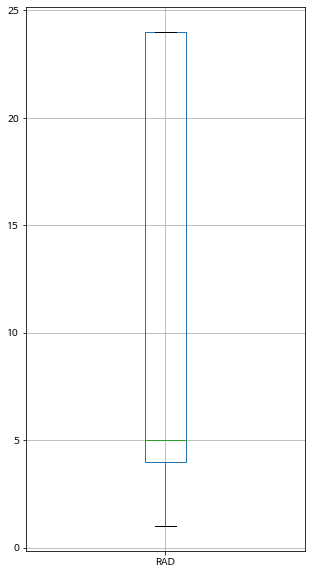

In [15]:
df_raw_R = df_raw[["RAD"]]
df_raw_R.boxplot(figsize = (5, 10))

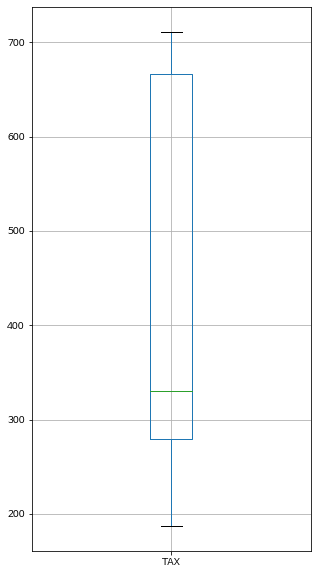

In [16]:
df_raw_T = df_raw[["TAX"]]
df_raw_T.boxplot(figsize = (5, 10))

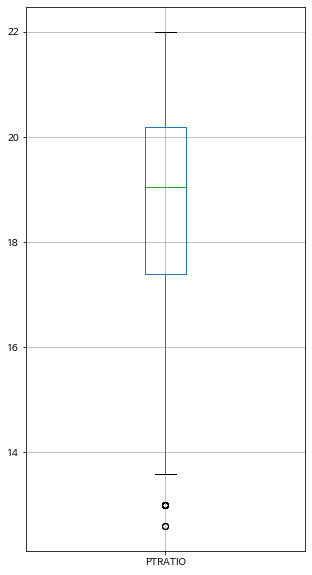

In [17]:
df_raw_P = df_raw[["PTRATIO"]]
df_raw_P.boxplot(figsize = (5, 10))

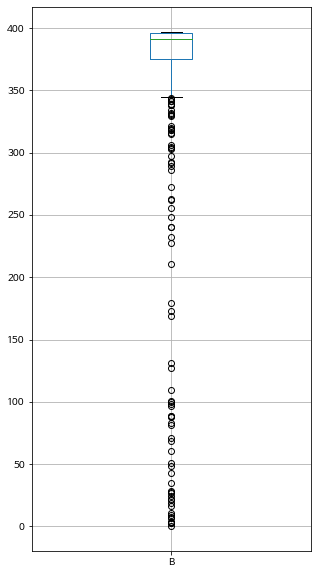

In [18]:
df_raw_B = df_raw[["B"]]
df_raw_B.boxplot(figsize = (5, 10))

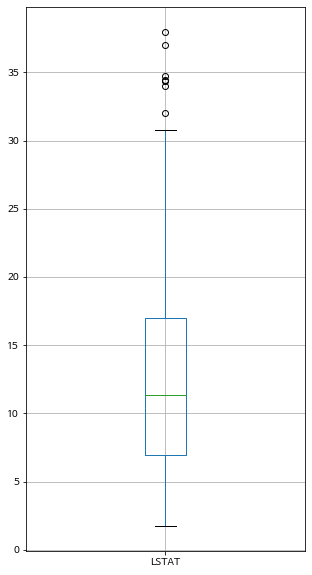

In [19]:
df_raw_L = df_raw[["LSTAT"]]
df_raw_L.boxplot(figsize = (5, 10))

# 전체 상관관계

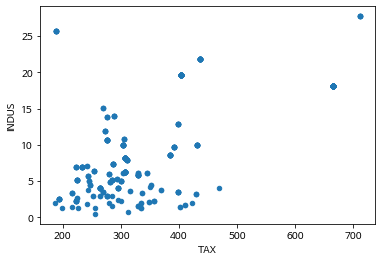

In [20]:
df_raw.plot.scatter(x = "TAX", y ="INDUS")

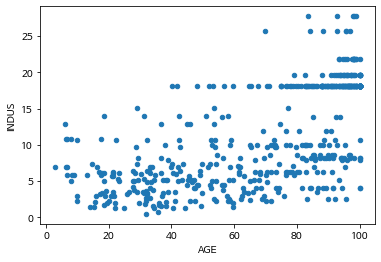

In [21]:
df_raw.plot.scatter(x = "AGE", y ="INDUS")

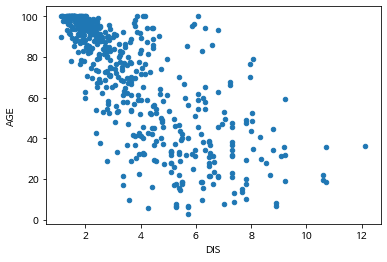

In [22]:
df_raw.plot.scatter(x = "DIS", y ="AGE")

In [23]:
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


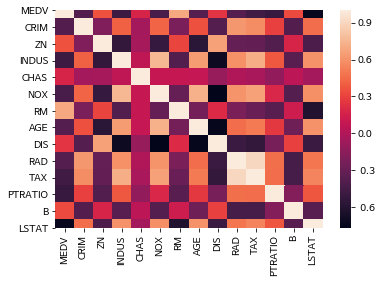

In [24]:
sns.heatmap(df_raw.corr(method = "pearson").round(3))

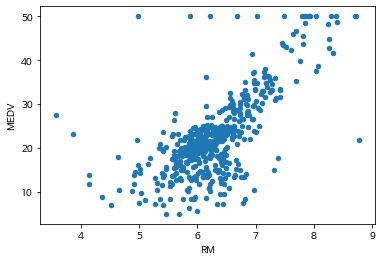

In [25]:
df_raw.plot.scatter(x = "RM", y ="MEDV")

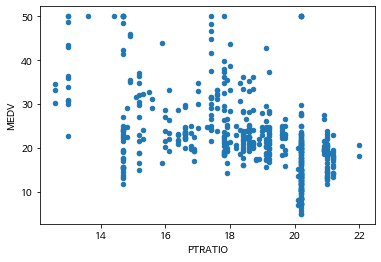

In [26]:
df_raw.plot.scatter(x = "PTRATIO", y ="MEDV")

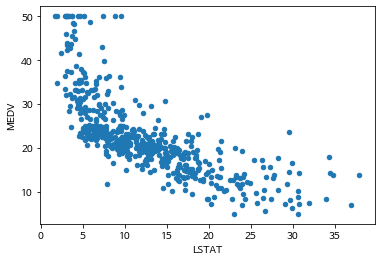

In [27]:
df_raw.plot.scatter(x = "LSTAT", y ="MEDV")

MEDV와 RM은 0.695의 높은 상관 관계를 갖고 있다.
MEDV와 PTRATIO은 -0.5의 높은 음의 상관관계를 갖고 있다.
MEDV와 LSTAT -0.7높은 음의 상관관계를 갖고 있다.

In [28]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

# 강 주변의 집이 더 높은 값일까?

# 2 sample t-test

귀무 가설(H0): 강 주변의 집의 가격은 차이가 없다.
대립 가설(H1): 강 주변의 집의 가격은 차이가 있다.

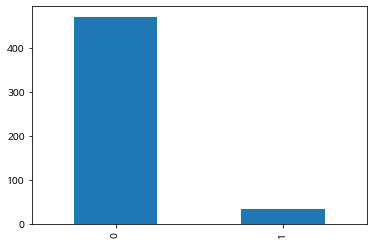

In [29]:
# 강 주변 집 갯수
df_count = df_raw["CHAS"].value_counts()
df_count.plot.bar()

In [30]:
cha = df_raw[df_raw["CHAS"]==1]
noncha = df_raw[df_raw["CHAS"]==0]
print(len(cha))
print(len(noncha))

35
471


In [31]:
from scipy.stats import shapiro
# 정규성 검정
print(shapiro(cha["MEDV"]))
print(shapiro(noncha["MEDV"]))

(0.8359232544898987, 0.00011230883683310822)
(0.9282605051994324, 3.113930960958397e-14)


In [32]:
# 등분산성 검정
stats.levene(cha["MEDV"], noncha["MEDV"])

LeveneResult(statistic=4.590342071304883, pvalue=0.03263097878646009)

In [33]:
# 2-Sample t-test
t_result = stats.ttest_ind(cha["MEDV"], noncha["MEDV"], equal_var = True)
t_result

Ttest_indResult(statistic=3.9964374793264246, pvalue=7.390622770250372e-05)

In [34]:
# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print(t, p)

3.996 0.0


In [35]:
# 2-sample t-test의 t값 p 출력
print("2-Sample t-test")
print("t: {}".format(t))
print("p: {}".format(p))

2-Sample t-test
t: 3.996
p: 0.0


In [36]:
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


# 도심 연결이 편한 위치의 집 값은 비싸지 않을까?

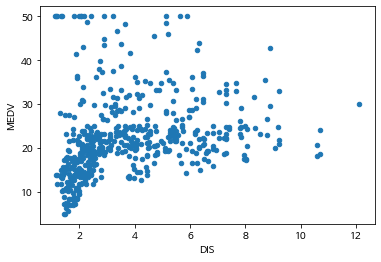

In [37]:
df_raw.plot.scatter(x = "DIS", y ="MEDV")

In [38]:
Q1 = df_raw[df_raw["DIS"]>0][df_raw["DIS"]<2.100175]
Q2 = df_raw[df_raw["DIS"]>2.100175][df_raw["DIS"]<3.207450]
Q3 = df_raw[df_raw["DIS"]>3.207450][df_raw["DIS"]<5.188425]
Q4 = df_raw[df_raw["DIS"]>5.188425]

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


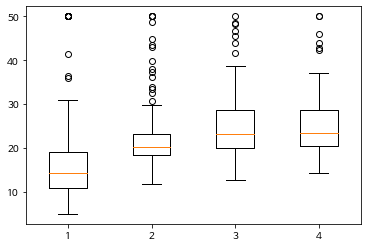

In [39]:
plot_data = [Q1["MEDV"], Q2["MEDV"], Q3["MEDV"], Q4["MEDV"]]
ax = plt.boxplot(plot_data)
plt.show()

In [40]:
# ANOVA 실행
f_result = stats.f_oneway(Q1["MEDV"], Q2["MEDV"], Q3["MEDV"], Q4["MEDV"])

# ANOVA의 F값 p값 저장
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

# ANOVA의 f값 p값 출력
print("One-way ")
print(" F 통계량: {}".format(f))
print(" p-value: {}".format(p))

One-way 
 F 통계량: 20.904
 p-value: 0.0


In [41]:
# 2-Sample t-test
t_result = stats.ttest_ind(Q1["MEDV"], Q2["MEDV"], equal_var = True)
t_result

Ttest_indResult(statistic=-4.016142495444711, pvalue=7.819688390763867e-05)

In [42]:
# 2-Sample t-test
t_result = stats.ttest_ind(Q2["MEDV"], Q3["MEDV"], equal_var = True)
t_result

Ttest_indResult(statistic=-2.302359732776989, pvalue=0.022137037018615604)

In [43]:
# 2-Sample t-test
t_result = stats.ttest_ind(Q3["MEDV"], Q4["MEDV"], equal_var = True)
t_result

Ttest_indResult(statistic=-0.3387917485195031, pvalue=0.7350498654419803)

In [44]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


# 오래된 주택이 많은 지역은 집값은 어떨까?


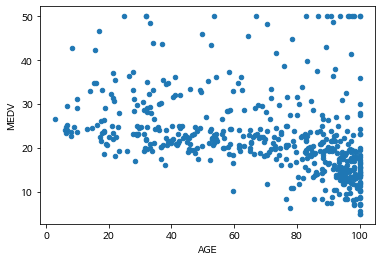

In [45]:
df_raw.plot.scatter(x = "AGE", y ="MEDV")

# 산화질소 농도가 높으면 어떨까?

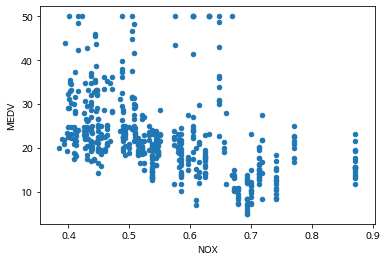

In [46]:
df_raw.plot.scatter(x = "NOX", y ="MEDV")

# 범죄률과 집 가격은 상관이 있을까?

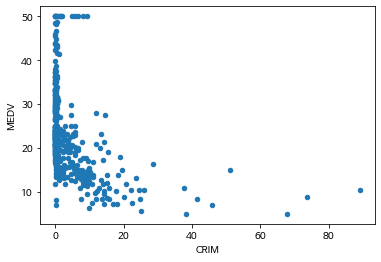

In [47]:
df_raw.plot.scatter(x = "CRIM", y ="MEDV")

## 별개 질문: 흑인들이 많으면 범죄율은 높을까?
- 흑인과 범죄율 간의 파생 변수 사용

In [48]:
np.mean(df_raw[df_raw["B"]<350]["CRIM"])

9.903437626536583

In [49]:
np.mean(df_raw[df_raw["B"]>350]["CRIM"])

2.39707791603066

In [50]:
df_raw["BCRIM"] = df_raw["B"] / np.sqrt(np.sqrt(df_raw["CRIM"]))

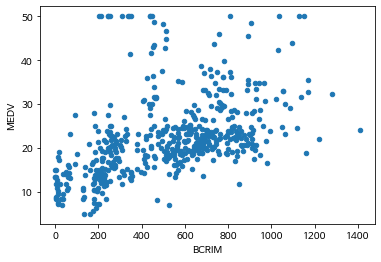

In [51]:
df_raw.plot.scatter(x = "BCRIM", y ="MEDV")

# 어떤 요소들이 집 값에 영향을 미칠까?
## 회귀분석

In [52]:
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 평가 함수
from statsmodels.tools.eval_measures import rmse
# jupyter notebook 사용시 그래프 자동 출력 옵션
%matplotlib inline

In [53]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에 줄 바꿈 "\" 추가
reg_model = smf.ols(formula= "MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT+BCRIM ", data = df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     101.8
Date:                Fri, 07 Feb 2020   Prob (F-statistic):          3.94e-135
Time:                        22:25:43   Log-Likelihood:                -1495.8
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     491   BIC:                             3085.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.3018      5.212      7.541      0.0

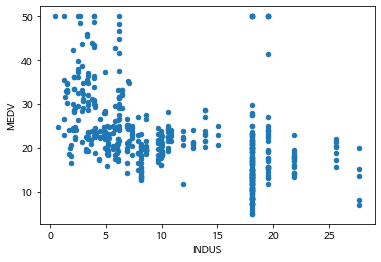

In [54]:
df_raw.plot.scatter(x = "INDUS", y ="MEDV")

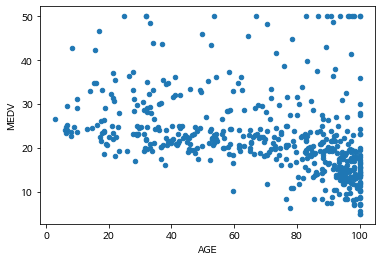

In [55]:
df_raw.plot.scatter(x = "AGE", y ="MEDV")

(0.9002699851989746, 1.1748451203174327e-17)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


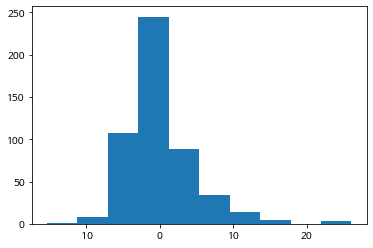

In [56]:
# 정규성 검정
plt.hist(reg_result.resid)
shapiro(reg_result.resid)

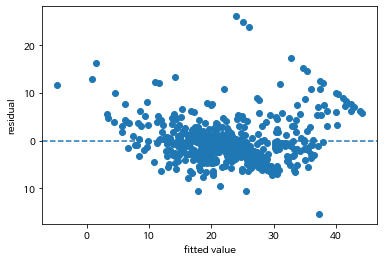

In [57]:
# 등분산성 검정
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

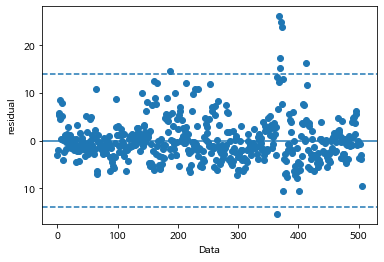

In [58]:
# 독립성 검정
plt.scatter(range(0,len(df_raw)), reg_result.resid, marker = "o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle = "--")

In [59]:
# 더빈왓슨 통계량
from statsmodels.stats.stattools import durbin_watson
durbin_watson(reg_result.resid)

1.0926015247986998

### 설명변수 간의 다중공선성 확인

In [60]:
# 데이터 구성: Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 평가 함수
from statsmodels.tools.eval_measures import rmse
# jupyter notebook 사용시 그래프 자동 출력 옵션
%matplotlib inline

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [61]:
# 설명변수 간의 다중공선성 확인: 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("MEDV", axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,CHAS,1.075
12,B,1.647
1,CRIM,1.796
11,PTRATIO,1.813
6,RM,1.934
2,ZN,2.641
13,LSTAT,2.957
7,AGE,3.139
8,DIS,3.959
3,INDUS,4.034


In [62]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,BCRIM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,520.577706
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,286.795630
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,0.198767
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,256.399156
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,546.018961
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,731.419933
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,1407.673136


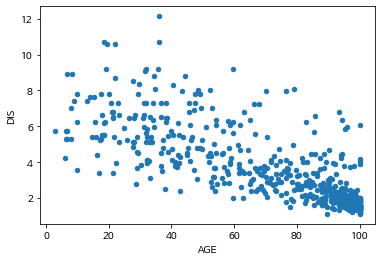

In [63]:
df_raw.plot.scatter(x = "AGE", y ="DIS")

In [69]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에 줄 바꿈 "\" 추가
reg_model = smf.ols(formula= "MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+RAD+TAX+PTRATIO+B+LSTAT+AD", data = df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     121.2
Date:                Fri, 07 Feb 2020   Prob (F-statistic):          1.53e-138
Time:                        22:25:46   Log-Likelihood:                -1492.6
No. Observations:                 506   AIC:                             3011.
Df Residuals:                     493   BIC:                             3066.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.4202      4.799      6.756      0.0

In [70]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에 줄 바꿈 "\" 추가
reg_model = smf.ols(formula= "MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+RAD+TAX+PTRATIO+B+LSTAT+AD+BCRIM", data = df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     112.6
Date:                Fri, 07 Feb 2020   Prob (F-statistic):          4.15e-138
Time:                        22:25:46   Log-Likelihood:                -1491.1
No. Observations:                 506   AIC:                             3010.
Df Residuals:                     492   BIC:                             3069.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.2642      4.912      6.976      0.0

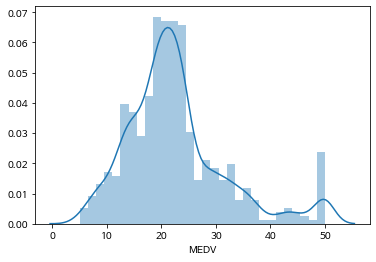

In [71]:
sns.distplot(df_raw['MEDV'], bins=30)


In [72]:
len(df_raw['MEDV'][df_raw['MEDV'] >43])

27

In [73]:
len(df_raw['MEDV'])

506

In [74]:
len(df_raw['MEDV'][df_raw['MEDV'] >43]) / len(df_raw['MEDV'])

0.0533596837944664

In [75]:
len(df_raw['MEDV'][df_raw['MEDV'] <10])

24

In [76]:
len(df_raw['MEDV'][df_raw['MEDV'] < 10]) / len(df_raw['MEDV'])

0.04743083003952569

In [77]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw["MEDV"]
df_raw_x = df_raw.drop("MEDV", axis = 1, inplace = False)

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data X size : {}".format(df_test_y .shape))

train data X size : (354, 15)
train data Y size : (354,)
test data X size : (152, 15)
test data X size : (152,)


# 의사결정나무

In [78]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.854


In [79]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)] #참조: para_leaf: [1,2,3,...,19]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [80]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.854
1,2,0.987,0.843
2,3,0.973,0.857
3,4,0.953,0.847
4,5,0.932,0.861
5,6,0.901,0.856
6,7,0.886,0.847
7,8,0.875,0.840
8,9,0.865,0.838
9,10,0.850,0.832


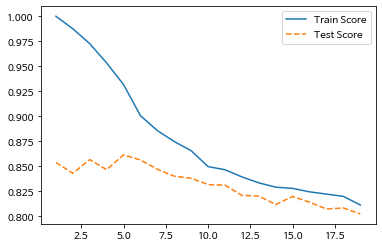

In [81]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

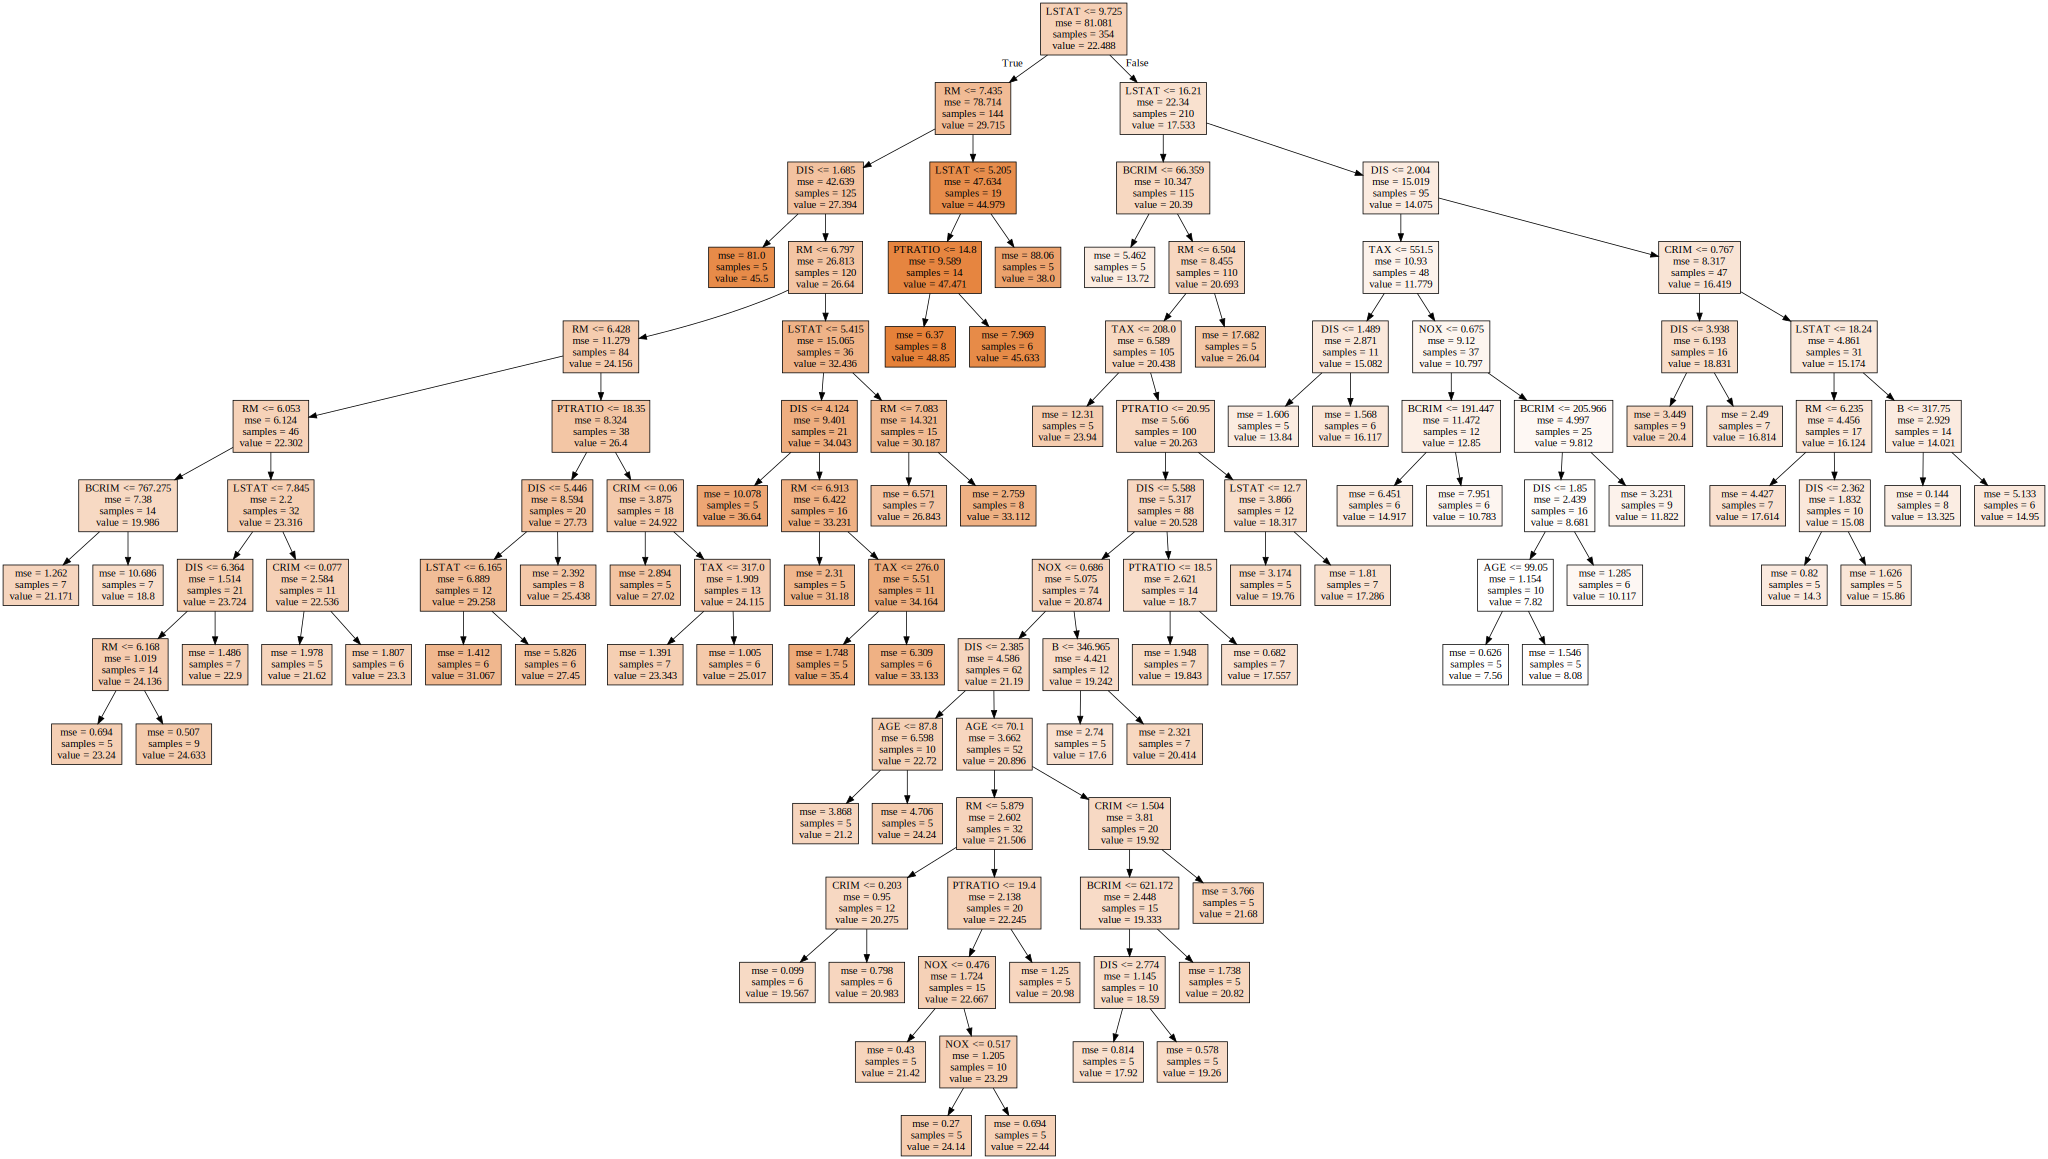

In [82]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 = 8 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

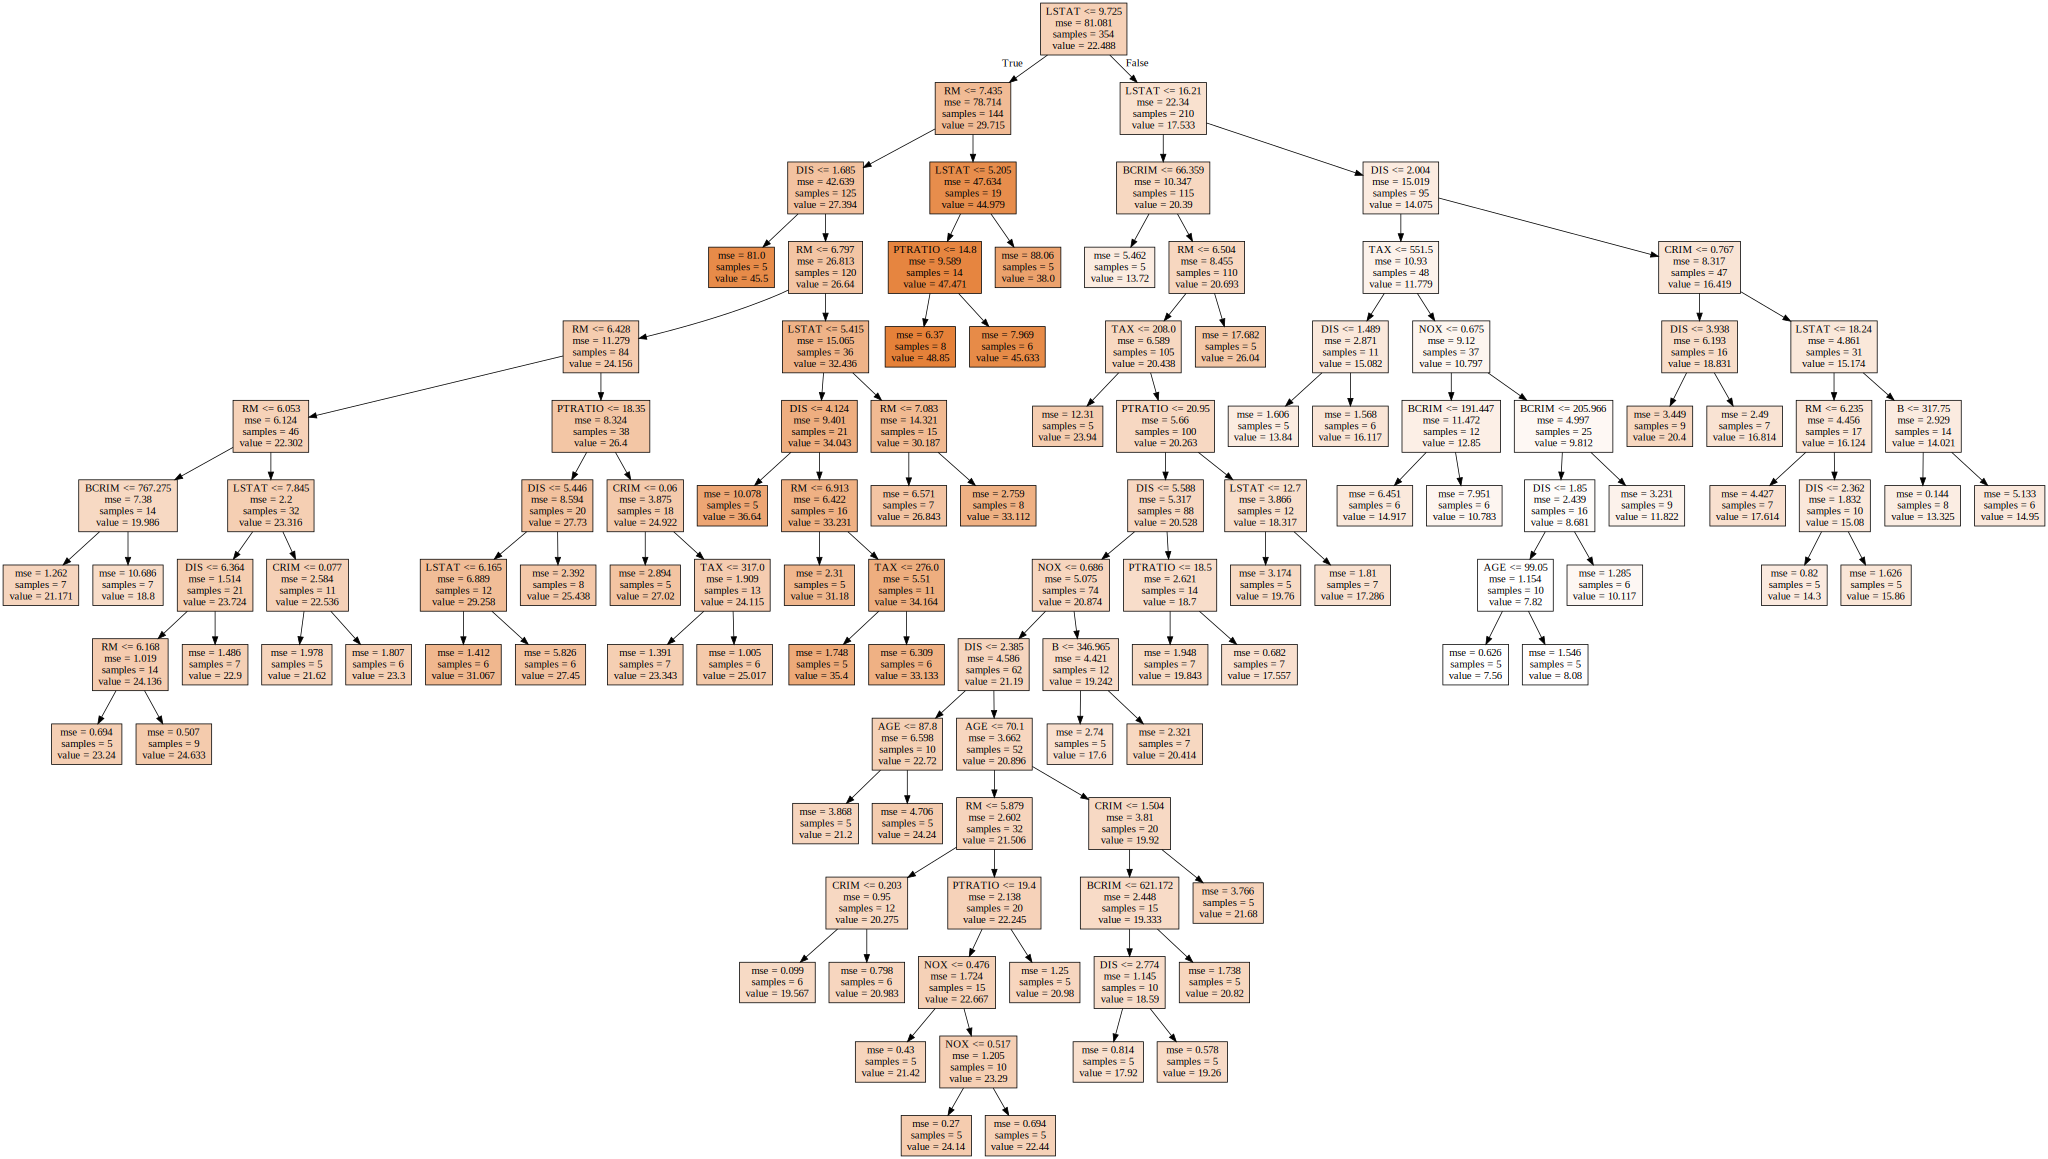

In [83]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 = 16 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

    MinSamplesSplit  TrainScore  TestScore
0                 4       0.932      0.861
1                 6       0.932      0.861
2                 8       0.932      0.861
3                10       0.932      0.861
4                12       0.929      0.863
5                14       0.924      0.861
6                16       0.915      0.847
7                18       0.910      0.853
8                20       0.898      0.865
9                22       0.892      0.861
10               24       0.892      0.861
11               26       0.890      0.857
12               28       0.890      0.857
13               30       0.890      0.857
14               32       0.889      0.860
15               34       0.888      0.860
16               36       0.888      0.860
17               38       0.881      0.849


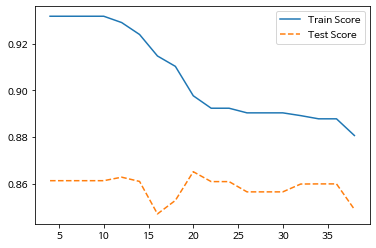

In [84]:
# 173
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리노드의 최소 자료수
para_split = [n_split*2 for n_split in range(2,20)]  # 참조: para_split: [4,6,8,...,38]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=5
                                 , min_samples_split = v_min_samples_split)

    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

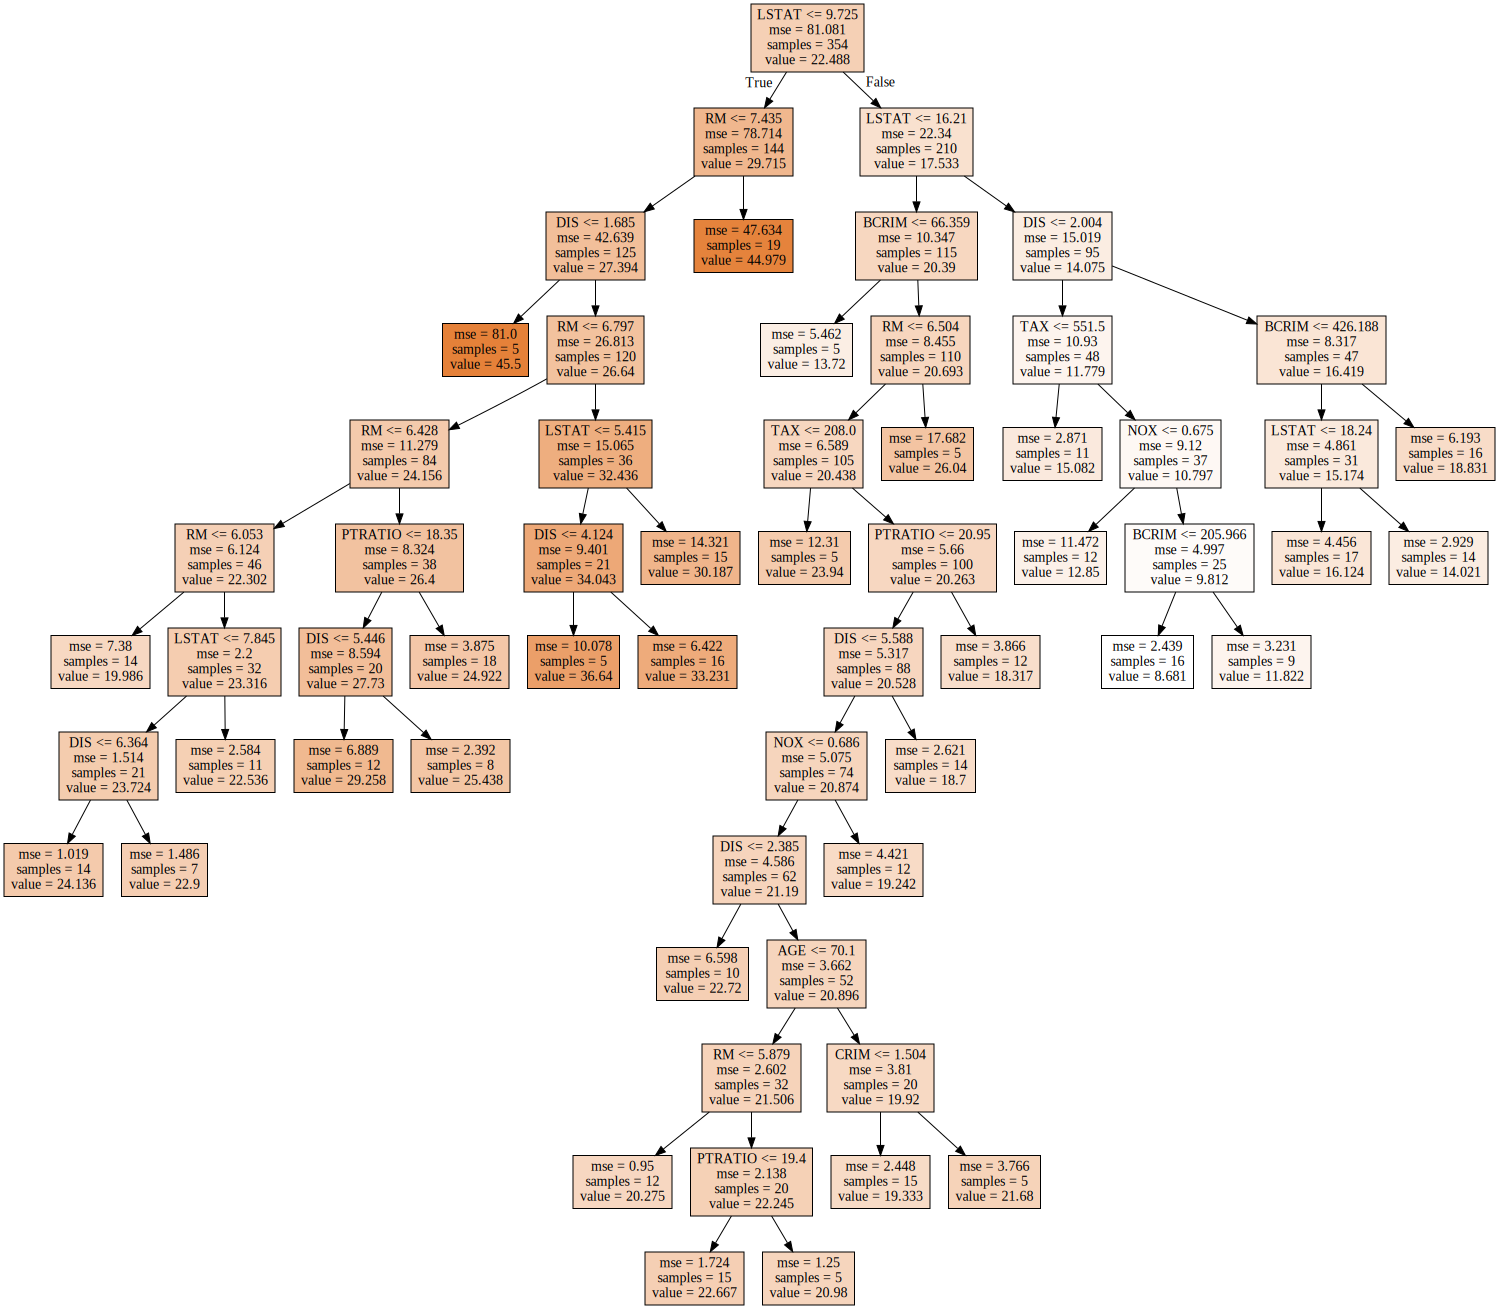

In [85]:
# 175
# 분리 노드의 최소 자료 수 = 20모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_split.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [86]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]  # 참조: para_depth: [1,2,3,...,10]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=5, min_samples_split=20
                                 , max_depth= v_max_depth)

    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [87]:
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.442,0.443
1,2,0.692,0.711
2,3,0.777,0.774
3,4,0.853,0.844
4,5,0.875,0.853
5,6,0.887,0.857
6,7,0.892,0.860
7,8,0.893,0.864
8,9,0.894,0.864
9,10,0.896,0.865


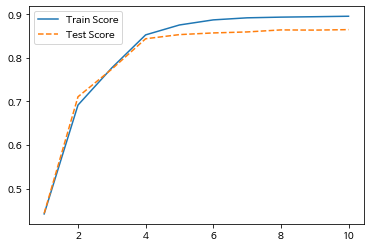

In [88]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

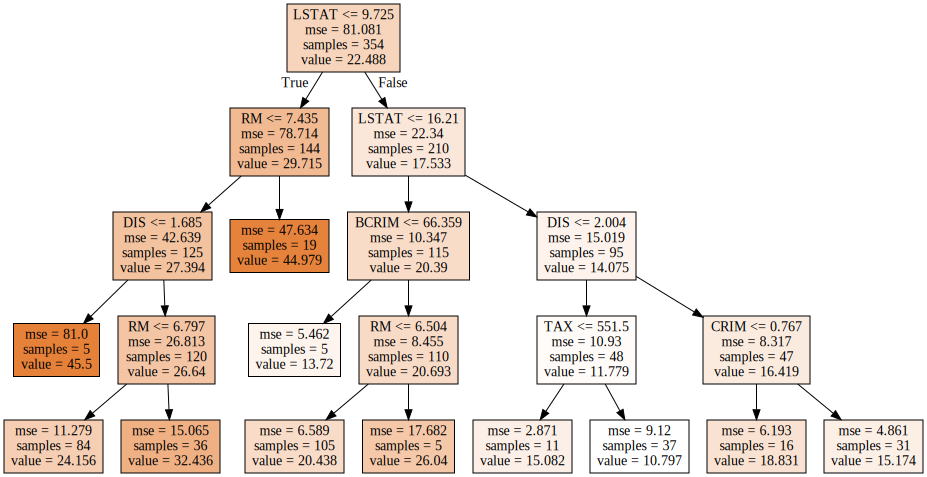

In [89]:
# 최대 깊이 = 2 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5, min_samples_split=20, max_depth =4)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_depth.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

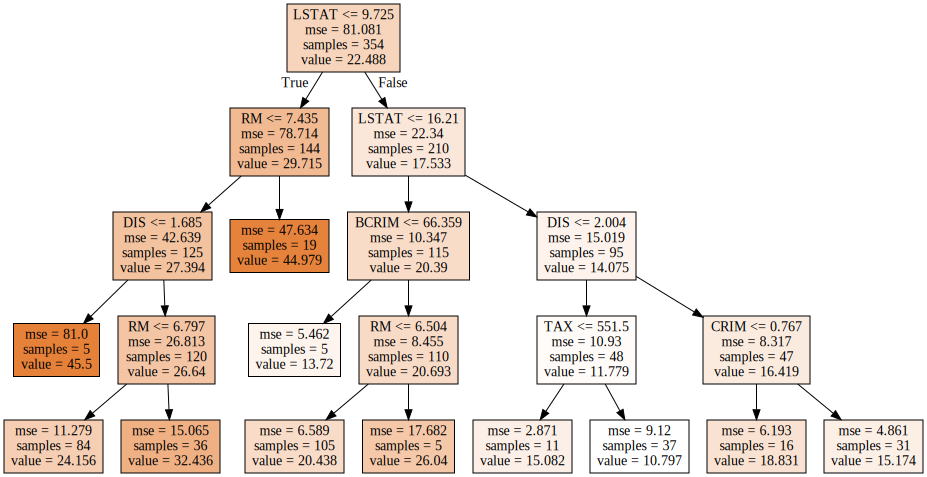

In [90]:
# 최대 깊이 = 2 모델
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5, min_samples_split=20, max_depth =4)
tree_final.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_final.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [91]:
# tree.feature_importances_로 설명변수 중요도 확인 및 데이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# feature_importances의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.603
5,RM,0.285
7,DIS,0.091
13,BCRIM,0.010
9,TAX,0.006
0,CRIM,0.006
1,ZN,0.000
2,INDUS,0.000
3,CHAS,0.000
4,NOX,0.000


Text(0, 0.5, '변수')

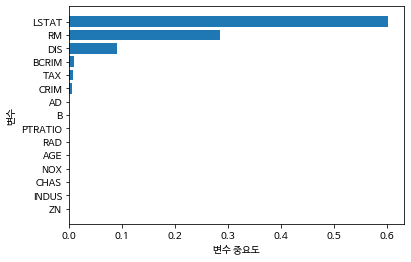

In [92]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [93]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))  

Score on training set: 0.853
Score on test set: 0.844


# 랜덤 포레스트

In [94]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.973
Score on test set: 0.884


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [95]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimators: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,21)] #참조: para_n_tree: [10,20,30,...,100]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["n_estimators"] = para_n_tree
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score


In [96]:
# 모델 설명력 확인
df_score_leaf.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.973,0.884
1,20,0.979,0.899
2,30,0.979,0.895
3,40,0.979,0.896
4,50,0.979,0.895
5,60,0.981,0.896
6,70,0.981,0.895
7,80,0.982,0.895
8,90,0.982,0.895
9,100,0.981,0.896


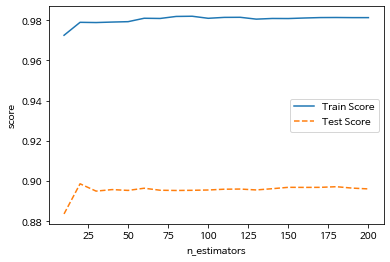

In [97]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [98]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)] #참조: para_leaf: [1,2,3,...,20]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 120,
                               min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score


In [99]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.981,0.896
1,2,0.968,0.892
2,3,0.948,0.888
3,4,0.928,0.882
4,5,0.910,0.875
5,6,0.896,0.869
6,7,0.884,0.865
7,8,0.874,0.860
8,9,0.866,0.857
9,10,0.859,0.854


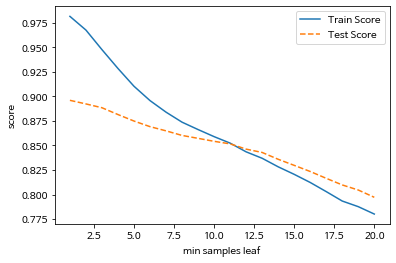

In [100]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [101]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(2,21)] #참조: para_leaf: [4,6,8,...,40]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 120, min_samples_leaf = 4,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score


In [102]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.928,0.882
1,6,0.928,0.882
2,8,0.928,0.882
3,10,0.923,0.879
4,12,0.917,0.878
5,14,0.910,0.876
6,16,0.905,0.873
7,18,0.900,0.872
8,20,0.896,0.870
9,22,0.892,0.869


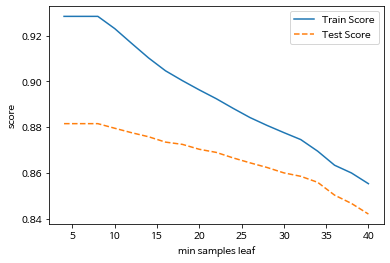

In [103]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [104]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [n_depth for n_depth in range(1,11)] 

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 120, 
                               min_samples_leaf = 4, min_samples_split = 10,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [105]:
# 모델 설명력 확인
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.580,0.601
1,2,0.767,0.779
2,3,0.852,0.845
3,4,0.888,0.868
4,5,0.905,0.874
5,6,0.915,0.877
6,7,0.919,0.879
7,8,0.921,0.879
8,9,0.922,0.879
9,10,0.923,0.879


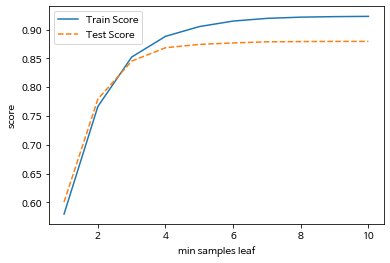

In [106]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [107]:
# 최대 깊이 = 2 모델
rf_final = RandomForestRegressor(random_state = 1234, n_estimators = 120, min_samples_leaf = 4, 
                                 min_samples_split = 10, max_depth = 8)

rf_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.921
Score on test set: 0.879


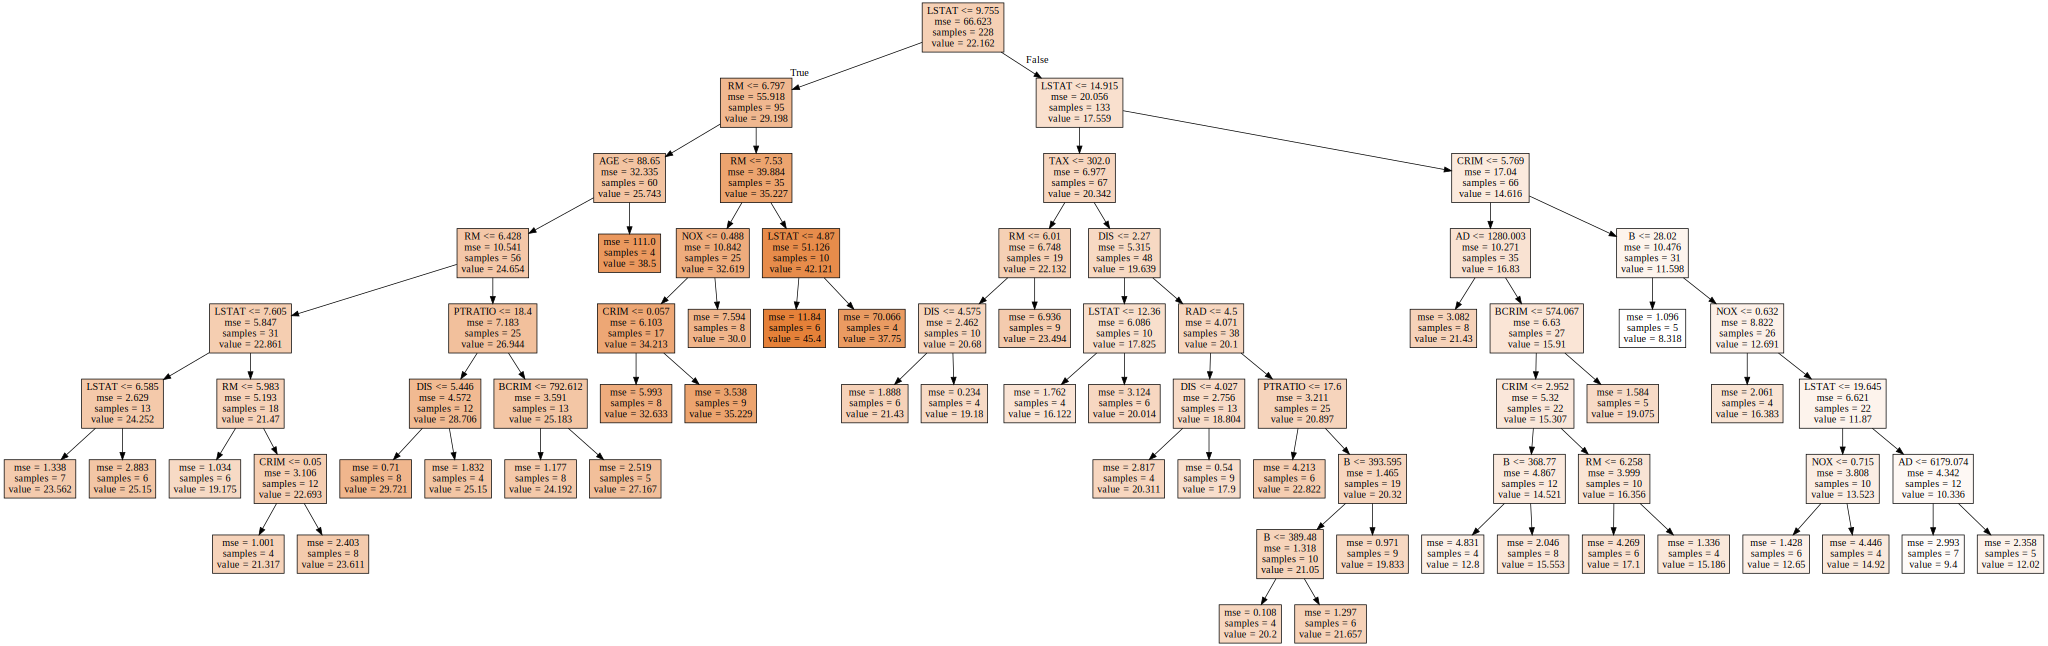

In [108]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",feature_names= v_feature_name, impurity=True, filled=True)

# tree_final_0.dot 그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [109]:
# tree.feature_importances_로 설명변수 중요도 확인 및 데이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# feature_importances의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)


,Feature,Importance
12,LSTAT,0.521
5,RM,0.348
7,DIS,0.021
14,AD,0.019
4,NOX,0.016
0,CRIM,0.015
6,AGE,0.015
10,PTRATIO,0.014
13,BCRIM,0.009
9,TAX,0.008


Text(0, 0.5, '변수')

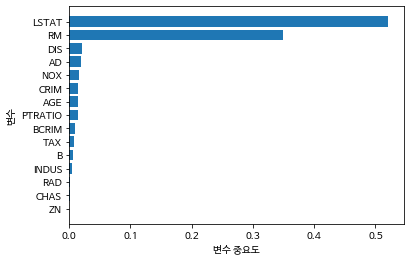

In [110]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 그래디언 부스트

In [112]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.981
Score on test set: 0.902


In [113]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimators: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)] #참조: para_n_tree: [10,20,30,...,100]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["Estimators"] = para_n_tree
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score


In [114]:
# 모델 설명력 확인
df_score_leaf.round(3)

,Estimators,TrainScore,TestScore
0,10,0.770,0.753
1,20,0.908,0.864
2,30,0.942,0.885
3,40,0.957,0.894
4,50,0.965,0.897
5,60,0.970,0.898
6,70,0.974,0.901
7,80,0.976,0.901
8,90,0.978,0.901
9,100,0.981,0.902


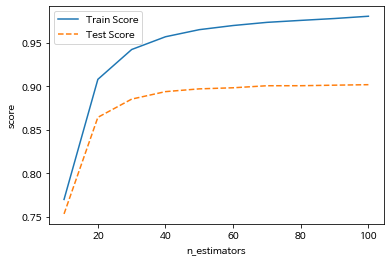

In [115]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [116]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)] #참조: para_leaf: [1,2,3,...,20]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100,
                               min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score


In [117]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.981,0.902
1,2,0.980,0.894
2,3,0.979,0.903
3,4,0.978,0.905
4,5,0.977,0.898
5,6,0.974,0.893
6,7,0.971,0.892
7,8,0.970,0.897
8,9,0.969,0.905
9,10,0.967,0.905


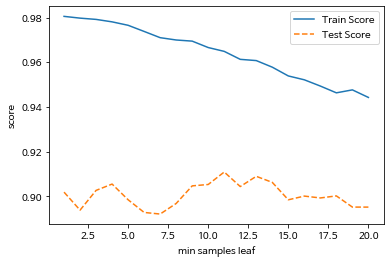

In [118]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [119]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(1,21)] #참조: para_leaf: [4,6,8,...,40]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [120]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.974,0.893
1,4,0.974,0.893
2,6,0.974,0.893
3,8,0.974,0.893
4,10,0.974,0.893
5,12,0.974,0.893
6,14,0.974,0.895
7,16,0.974,0.892
8,18,0.973,0.893
9,20,0.973,0.899


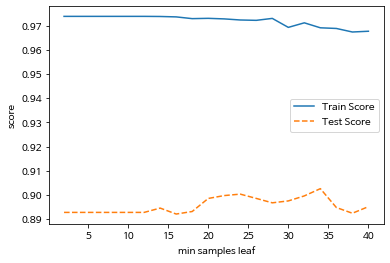

In [121]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [122]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [n_depth for n_depth in range(1,11)] # 참조: para+depth:[1,2,3, ...,10]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, 
                               min_samples_leaf = 6, min_samples_split =28,
                               max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [123]:
# 모델 설명력 확인
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.878,0.805
1,2,0.944,0.874
2,3,0.973,0.897
3,4,0.984,0.909
4,5,0.991,0.906
5,6,0.994,0.908
6,7,0.996,0.904
7,8,0.996,0.907
8,9,0.997,0.900
9,10,0.998,0.902


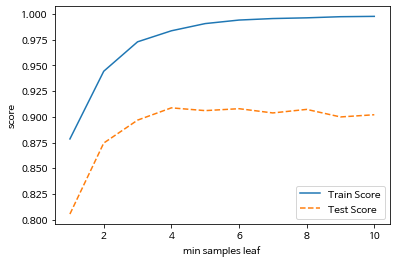

In [124]:
# 모델 설명력 그래프 확인: 4개
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [125]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# learning rate: 학습률 변경 -.1 ~0.9
para_lr = [lr * 0.1 for lr in range(1,11)] # 참조: para+depth:[0.1,0.2,0.3, ...,0.9]


for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, 
                               min_samples_leaf = 6, min_samples_split = 28,
                               max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["LearningRate"] = para_lr
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [126]:
# 모델 설명력 확인
df_score_split.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.973,0.897
1,0.2,0.987,0.898
2,0.3,0.992,0.892
3,0.4,0.997,0.897
4,0.5,0.998,0.860
5,0.6,0.998,0.882
6,0.7,0.999,0.870
7,0.8,0.999,0.870
8,0.9,0.999,0.852
9,1.0,1.000,0.791


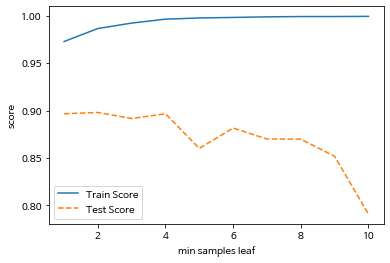

In [127]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [128]:
gb_final = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6, 
                                     min_samples_split = 28, max_depth = 3, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))  

Score on training set: 0.973
Score on test set: 0.897


In [129]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 데이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# feature_importances의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.533
5,RM,0.271
7,DIS,0.055
10,PTRATIO,0.026
13,BCRIM,0.024
14,AD,0.019
4,NOX,0.018
9,TAX,0.018
0,CRIM,0.014
6,AGE,0.008


Text(0, 0.5, '변수')

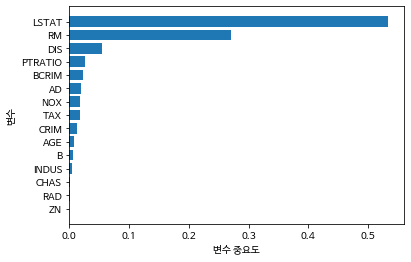

In [130]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [131]:
# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE: mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100

In [132]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw["MEDV"]
df_raw_x = df_raw.drop("MEDV", axis = 1, inplace = False)

In [133]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data X size : {}".format(df_test_y .shape))

train data X size : (354, 15)
train data Y size : (354,)
test data X size : (152, 15)
test data X size : (152,)


In [134]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에 줄 바꿈 "\" 추가
lr_model = smf.ols(formula= "MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT", data = df_raw)
lr_result = lr_model.fit()
# print(lr_result.summary())

# Decision Tree
dt_model = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split=20, max_depth =4)
dt_model.fit(df_train_x, df_train_y)



# Random Forest
rf_model = RandomForestRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6, 
                                 min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6, 
                                     min_samples_split = 28, max_depth = 3, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=28,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [135]:
# 모델 리스트, 그래프 그리기 생성 목적
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
# 평가 리스트 초기화
mse, rmse, mae, mape = [], [], [],[]

In [136]:
## 회귀분석
# 예측
lr_y_pred = lr_result.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

In [137]:
## 의사결정나무
# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [138]:
## 랜덤 포레스트
# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [139]:
## 그래디언트 부스팅
# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

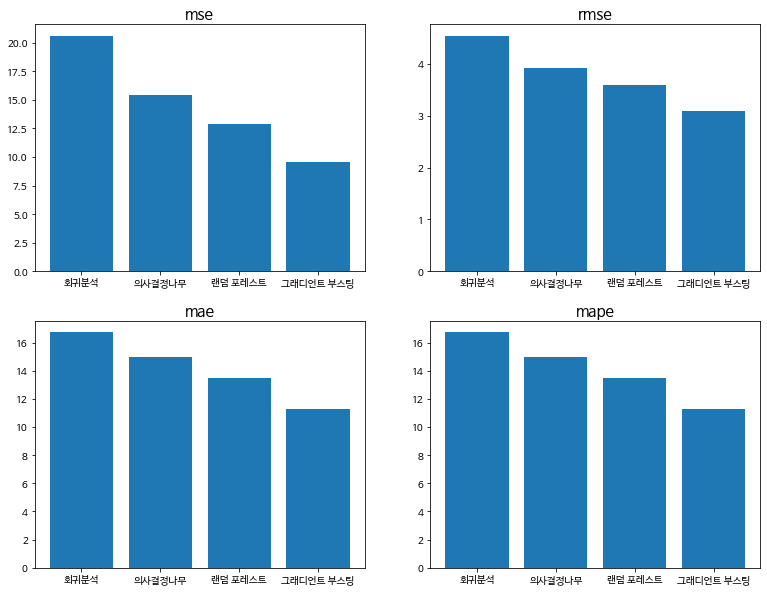

In [140]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)